In [85]:
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv("data/breast_cancer.csv").drop("id", axis = 1)

In [47]:
df["barenuclei"] = df["barenuclei"].apply(lambda x: x if x != '?' else 0).astype(int) 

In [48]:
df.head(2)

,clumpthickness,uniformcellsize,uniformcellshape,margadhesion,epithelial,barenuclei,blandchromatin,normalnucleoli,mitoses,benormal
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2


In [68]:
X = df.drop("benormal", axis = 1)
# Mapeo de la variable objetivo 2 es benigno y 4 es maligno
y = df["benormal"].apply(lambda x: {2: 0, 4: 1}[x])

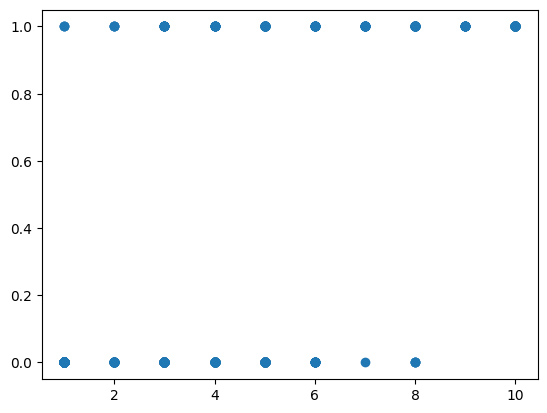

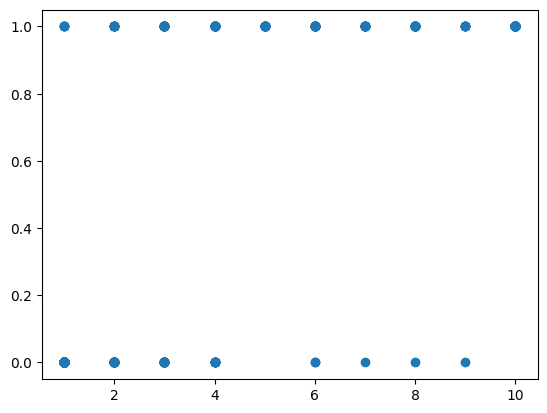

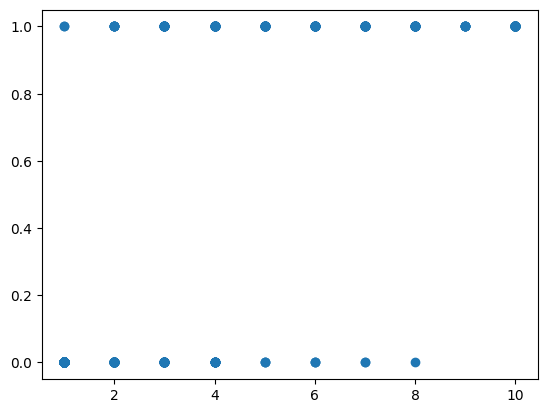

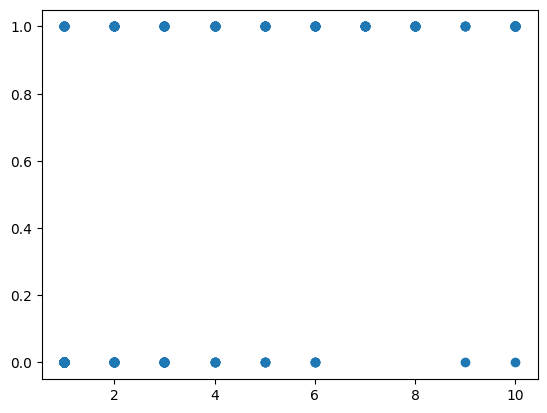

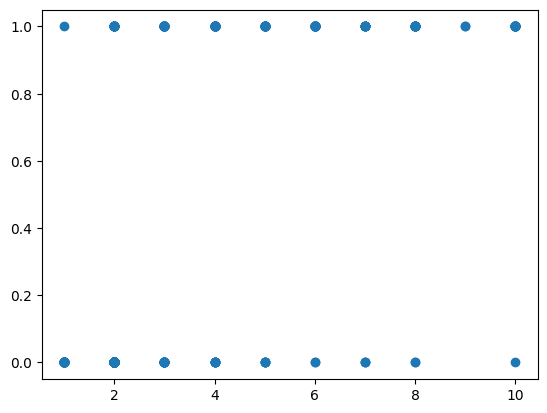

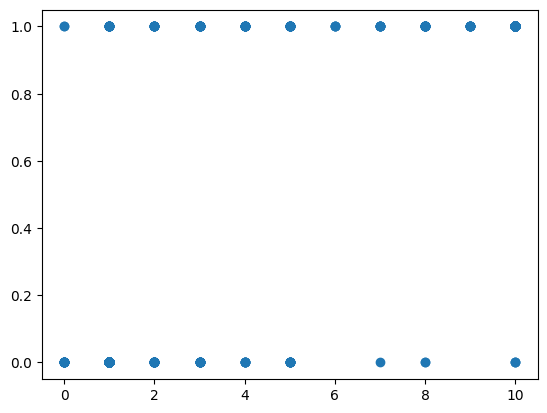

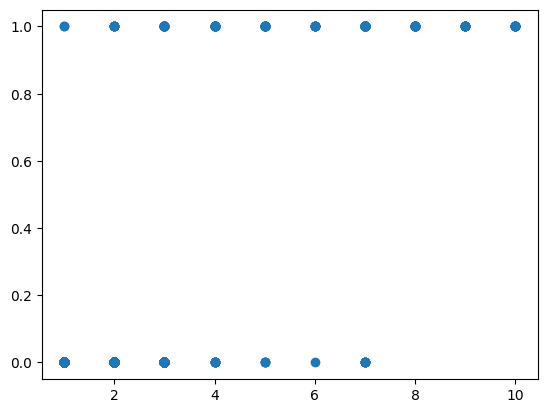

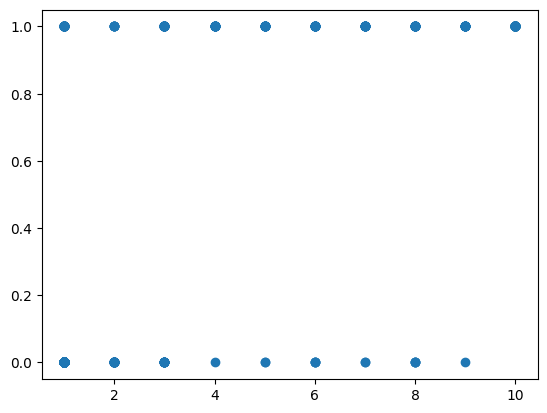

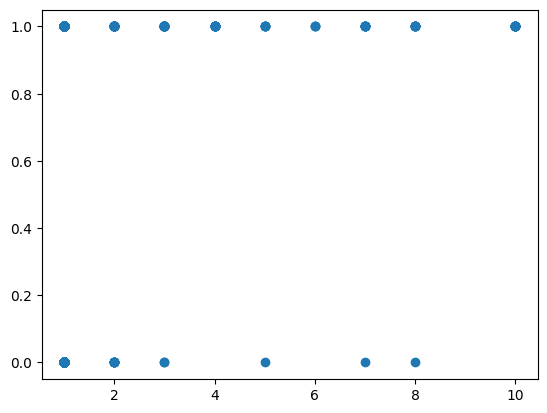

In [69]:
# Utilizar una única característica para un modelo de regresión logística simple
# no permitiría generalizar el modelo para hacer predicciones correctas
for caracteristica in X.columns:
    plt.scatter(df[caracteristica], y)
    plt.show()

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
logreg = LogisticRegression()

In [74]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [81]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [84]:
y_probs = logreg.predict_proba(X_test) # Devuelve una cantidad de columnas en función de las clases
y_probs[:5, :]

array([[8.01540098e-07, 9.99999198e-01],
       [9.99449882e-01, 5.50117549e-04],
       [9.88487089e-01, 1.15129107e-02],
       [9.92194499e-01, 7.80550076e-03],
       [9.75985589e-01, 2.40144109e-02]])

In [90]:
threshold = 0.2
(y_probs[:, 1] > threshold).astype(int)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [76]:
# Métricas de rendimiento

In [77]:
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
confusion_matrix(y_test, y_pred)

array([[140,   4],
       [  3,  63]])

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       144
           1       0.94      0.95      0.95        66

    accuracy                           0.97       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210

